In [56]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Car_Mileage_Prediction.csv')
df.head()





,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,simple,5.808422,2010,Diesel,31.043927,1691.952993,Manual,38.504905,0
1,imagine,1.194425,2015,Petrol,15.833684,1653.807171,Manual,37.561167,0
2,appear,5.208377,2003,Diesel,12.716929,2128.202900,Manual,42.942509,1
3,him,5.737773,2007,Hybrid,25.766081,1525.699894,Manual,59.624379,0
4,create,5.309426,2014,Petrol,NaN,988.447402,Manual,34.499603,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Model           980 non-null    object 
 1   Engine_Size         950 non-null    float64
 2   Year                980 non-null    int64  
 3   Fuel_Type           980 non-null    object 
 4   Mileage             931 non-null    float64
 5   Weight              980 non-null    float64
 6   Transmission        980 non-null    object 
 7   Fuel_Tank_Capacity  980 non-null    float64
 8   Service_History     980 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 69.0+ KB


In [22]:
df.isnull().sum()

,0
Car_Model,0
Engine_Size,30
Year,0
Fuel_Type,0
Mileage,49
Weight,0
Transmission,0
Fuel_Tank_Capacity,0
Service_History,0


In [23]:
df['Engine_Size']=df['Engine_Size'].fillna(df['Engine_Size'].mean())

In [24]:
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())

In [25]:
df.isnull().sum()



















,0
Car_Model,0
Engine_Size,0
Year,0
Fuel_Type,0
Mileage,0
Weight,0
Transmission,0
Fuel_Tank_Capacity,0
Service_History,0


In [26]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [27]:
num_columns

Index(['Engine_Size', 'Year', 'Mileage', 'Weight', 'Fuel_Tank_Capacity',
       'Service_History'],
      dtype='object')

In [28]:
cat_columns

Index(['Car_Model', 'Fuel_Type', 'Transmission'], dtype='object')

In [29]:
  # Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [30]:
df.head()

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,483,5.808422,2010,0,31.043927,1691.952993,1,38.504905,0
1,271,1.194425,2015,3,15.833684,1653.807171,1,37.561167,0
2,35,5.208377,2003,0,12.716929,2128.202900,1,42.942509,1
3,256,5.737773,2007,2,25.766081,1525.699894,1,59.624379,0
4,133,5.309426,2014,3,22.652515,988.447402,1,34.499603,1


In [31]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [39]:
df.head(750)

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,483,0.962080,0.454545,0,0.744772,0.524305,1,0.212546,0.0
1,271,0.037497,0.681818,3,0.309584,0.501825,1,0.188949,0.0
2,35,0.841839,0.136364,0,0.220409,0.781395,1,0.323505,1.0
3,256,0.947923,0.318182,2,0.593765,0.426330,1,0.740624,0.0
4,133,0.862088,0.636364,3,0.504681,0.109718,1,0.112396,1.0
...,...,...,...,...,...,...,...,...,...
745,553,0.042101,0.954545,3,0.701311,0.014908,1,0.209434,1.0
746,348,0.183240,0.590909,0,0.128486,0.167253,0,0.358936,0.0
747,194,0.714795,0.272727,1,0.212819,0.538883,1,0.123921,0.0
748,514,0.058927,0.954545,3,0.487693,0.720535,0,0.037356,1.0


In [41]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Mileage',axis=1)  # -- independent variable
y = df['Mileage'] # -- dependent variable

In [35]:
df.head()

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,483,0.962080,0.454545,0,0.744772,0.524305,1,0.212546,0.0
1,271,0.037497,0.681818,3,0.309584,0.501825,1,0.188949,0.0
2,35,0.841839,0.136364,0,0.220409,0.781395,1,0.323505,1.0
3,256,0.947923,0.318182,2,0.593765,0.426330,1,0.740624,0.0
4,133,0.862088,0.636364,3,0.504681,0.109718,1,0.112396,1.0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
df.head(750)

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,483,0.962080,0.454545,0,0.744772,0.524305,1,0.212546,0.0
1,271,0.037497,0.681818,3,0.309584,0.501825,1,0.188949,0.0
2,35,0.841839,0.136364,0,0.220409,0.781395,1,0.323505,1.0
3,256,0.947923,0.318182,2,0.593765,0.426330,1,0.740624,0.0
4,133,0.862088,0.636364,3,0.504681,0.109718,1,0.112396,1.0
...,...,...,...,...,...,...,...,...,...
745,553,0.042101,0.954545,3,0.701311,0.014908,1,0.209434,1.0
746,348,0.183240,0.590909,0,0.128486,0.167253,0,0.358936,0.0
747,194,0.714795,0.272727,1,0.212819,0.538883,1,0.123921,0.0
748,514,0.058927,0.954545,3,0.487693,0.720535,0,0.037356,1.0


In [44]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [45]:
df.head()

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,483,0.962080,0.454545,0,0.744772,0.524305,1,0.212546,0.0
1,271,0.037497,0.681818,3,0.309584,0.501825,1,0.188949,0.0
2,35,0.841839,0.136364,0,0.220409,0.781395,1,0.323505,1.0
3,256,0.947923,0.318182,2,0.593765,0.426330,1,0.740624,0.0
4,133,0.862088,0.636364,3,0.504681,0.109718,1,0.112396,1.0


In [46]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [47]:
df.head()

,Car_Model,Engine_Size,Year,Fuel_Type,Mileage,Weight,Transmission,Fuel_Tank_Capacity,Service_History
0,483,0.962080,0.454545,0,0.744772,0.524305,1,0.212546,0.0
1,271,0.037497,0.681818,3,0.309584,0.501825,1,0.188949,0.0
2,35,0.841839,0.136364,0,0.220409,0.781395,1,0.323505,1.0
3,256,0.947923,0.318182,2,0.593765,0.426330,1,0.740624,0.0
4,133,0.862088,0.636364,3,0.504681,0.109718,1,0.112396,1.0


In [48]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.08304241620802971
Mean Absolute Error: 0.24550645509767657
R-squared: -0.04040039106919169


In [49]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [51]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08934692506691136
Mean Absolute Error: 0.25880452874326926
R-squared: -0.11938669447645478


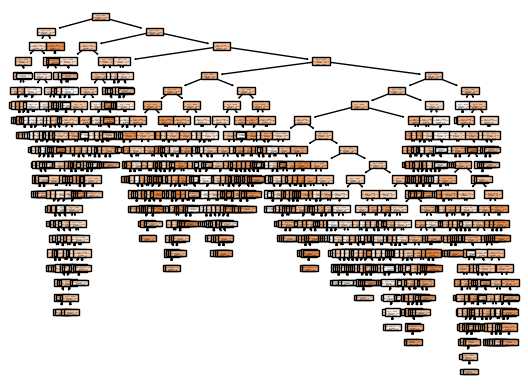

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [53]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [55]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Beaved as 'best_model.pkl'")

Beaved as 'best_model.pkl'
